In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

using logistic regression to recognise handwritten number 3 and 4.


In [2]:
theta = np.loadtxt("theta.txt") #theta.txt -> finding 0 and 1 in handwritten numbers
theta.shape[0]

785

In [4]:
def sigmoid(s): #use formula in the logistic regression 
    return 1/(1 + np.exp(-s))


In [5]:
image = cv2.imread('image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0) 


_, im_th = cv2.threshold(image_gray, 155, 255, cv2.THRESH_BINARY_INV)

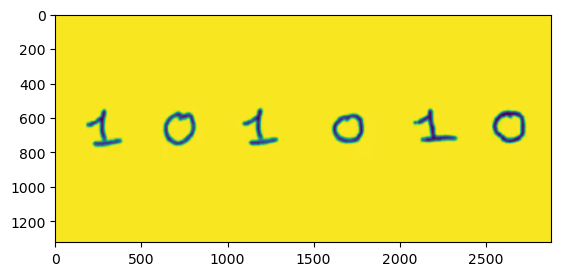

In [6]:
plt.imshow(image_gray)

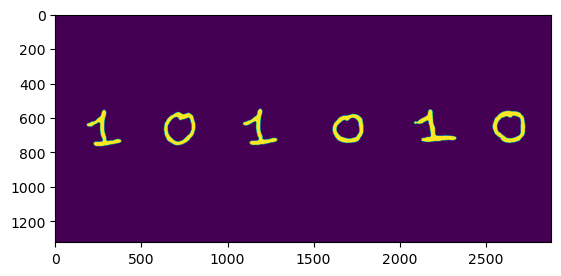

In [7]:
plt.imshow(im_th)

In [8]:
def findNumber(image, im_th, theta):
    contours, _ = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(contour) for contour in contours]


    for rect in rects:

        cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), 6)
        length = int(rect[3]*1.6)
        pt1 = int(rect[1] + rect[3] // 2 - length //2)
        pt2 = int(rect[0] + rect[2] // 2 - length //2)

        roi = im_th[pt1:pt1+length, pt2:pt2+length]
        #resize roi
        roi = cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (3, 3))

        #input is an array of 28x28
        x = np.array((roi).reshape(1, 28*28))
        #adding ones
        ones = np.ones((x.shape[0],1))

        x = np.concatenate((x, ones), axis = 1)
        predict = sigmoid(np.dot(x, theta.T))


        cv2.putText(image, str(int(predict)), (rect[0], rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 8, (255, 0, 0), 5)
        # print(predict)

        # plt.imshow(roi)

    plt.imshow(image)


    #convert roi to image 28x28, lets find out if the roi is correct

/var/folders/c9/8rc_zy1n66b9fv9658s4z6g00000gn/T/ipykernel_39918/378135591.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


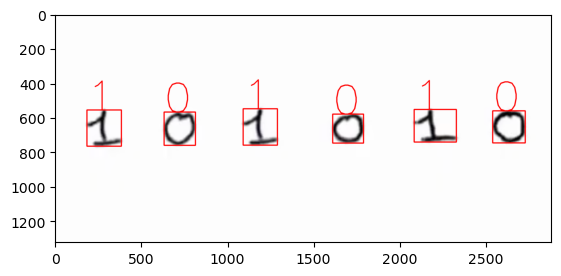

In [9]:
findNumber(image, im_th, theta)

In [10]:
#use my own image to test
testimage = cv2.imread('tester.jpg')
testimage_gray = cv2.cvtColor(testimage, cv2.COLOR_BGR2GRAY)
testimage_gray = cv2.GaussianBlur(testimage_gray, (5, 5), 0) 


_, test_im_th = cv2.threshold(testimage_gray, 155, 255, cv2.THRESH_BINARY_INV)

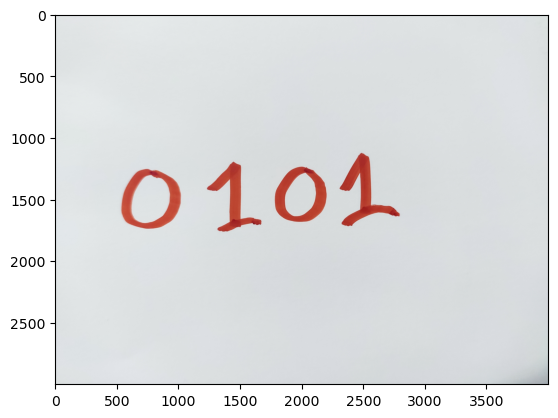

In [11]:
plt.imshow(testimage)

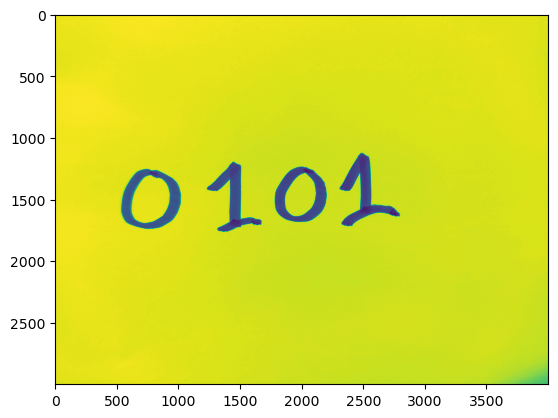

In [12]:
plt.imshow(testimage_gray)

/var/folders/c9/8rc_zy1n66b9fv9658s4z6g00000gn/T/ipykernel_39918/378135591.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


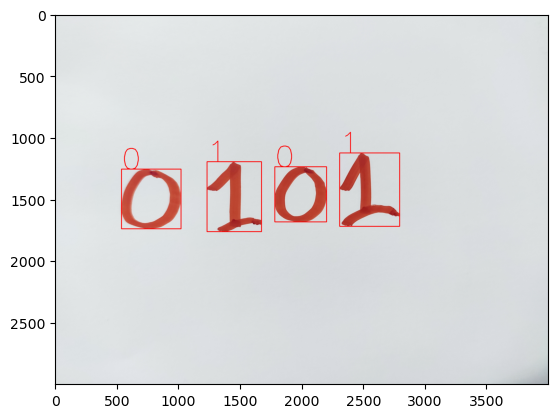

In [13]:
findNumber(testimage, test_im_th, theta)

# Recognising handdrawn 3 and 4



In [14]:
#get theta three four
thetaThreeFour = np.loadtxt("thetathreefour.txt")
thetaThreeFour.shape[0]


785

In [15]:
#use my own image to test
testThreeFourImage = cv2.imread('threefour.jpg')
testThreeFourGray = cv2.cvtColor(testThreeFourImage, cv2.COLOR_BGR2GRAY)
testThreeFourGray = cv2.GaussianBlur(testThreeFourGray, (5, 5), 0) 


_, testThreeFourThreshold = cv2.threshold(testThreeFourGray, 155, 255, cv2.THRESH_BINARY_INV)

In [16]:
def findThreeFourNumber(image, im_th, thetaThreeFour):
    contours, _ = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(contour) for contour in contours]

    for rect in rects:
        length = int(rect[3] * 1.6)
        pt1 = int(rect[1] + rect[3] // 2 - length // 2)
        pt2 = int(rect[0] + rect[2] // 2 - length // 2)

        roi = im_th[pt1:pt1 + length, pt2:pt2 + length]
        # Resize roi
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (3, 3))

        x = np.array((roi).reshape(1, 28*28))
        ones = np.ones((x.shape[0], 1))

        x = np.concatenate((x, ones), axis=1)
        predict = sigmoid(np.dot(x, thetaThreeFour.T))


        #đổi lại ở phần này tại vì phần nhập 0 và một ta không cần quan tâm đến giá trị của prediction
        if predict > 0.5:
            digit = 4
        else:
            digit = 3

        cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), 6)
        cv2.putText(image, str(digit), (rect[0], rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 8, (255, 0, 0), 5)

    plt.imshow(image)


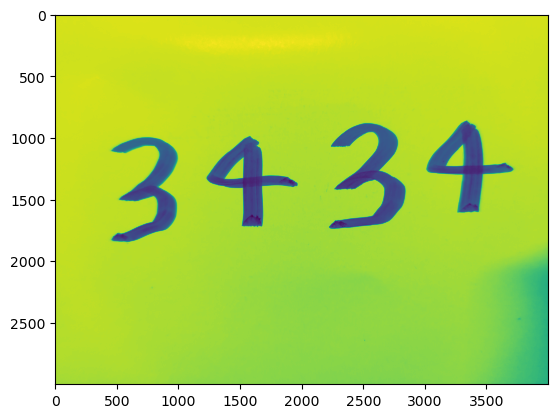

In [17]:
plt.imshow(testThreeFourGray)

/var/folders/c9/8rc_zy1n66b9fv9658s4z6g00000gn/T/ipykernel_39918/378135591.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


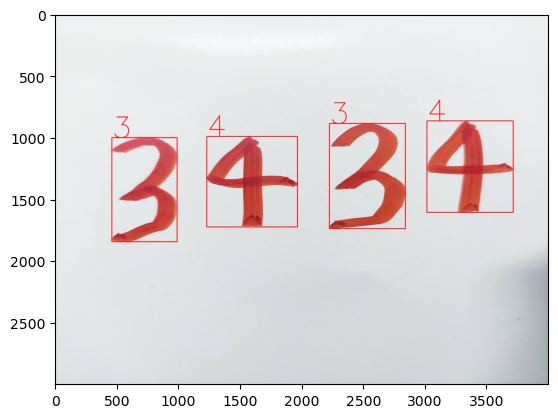

In [18]:
findThreeFourNumber(testThreeFourImage, testThreeFourThreshold, thetaThreeFour)